In [1]:
import math
from inspect import isfunction
from functools import partial

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from einops import rearrange, reduce
from einops.layers.torch import Rearrange

import torch
from torch import nn, einsum
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from Unet import *
from DiffusionModel import *

In [2]:
# define hyperparameters

image_size = 32
channel = 1

batchsize = 256

timestep = 1000
length = 100

lr = 1e-3
epochs = 1

dimmults = (1,2,4,8)

device = "cuda:0" if torch.cuda.is_available() else "cpu"
#device = "cpu"
print(device)

cuda:0


In [3]:
# sample from loaded models

loaded_linear_net = Unet(
    dim=image_size,
    channels=channel,
    dim_mults=dimmults
)
loaded_linear_net, linear_alphas, linear_sqrt_alphas, linear_sqrt_one_minus_alphas = load_net_betas(loaded_linear_net, device, "DDIM_model", "DDIM")
loaded_linear_net, loaded_linear_betas, loaded_linear_sampling_1, loaded_linear_sampling_2 = load_net_betas(loaded_linear_net, device, "DDIM_model")

In [4]:
# using same init_noise

init_noise = torch.randn((1,1,32,32))

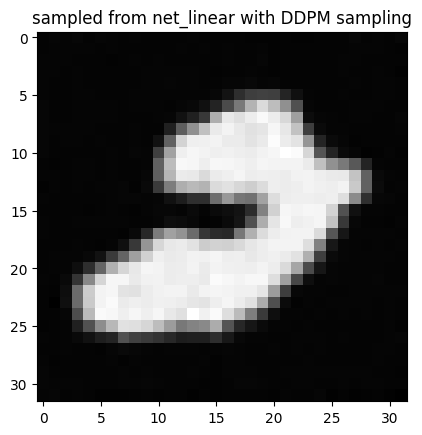

In [5]:
# sampling - DDPM

res_2:torch.Tensor = sampling(timestep,
                              loaded_linear_betas,
                              loaded_linear_sampling_1,
                              loaded_linear_sampling_2,
                              loaded_linear_net,
                              device,
                              init_noise)
plt.figure()
plt.title("sampled from net_linear with DDPM sampling")
plt.imshow(res_2.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')

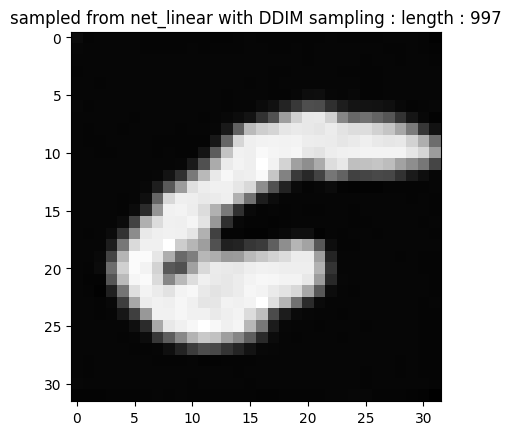

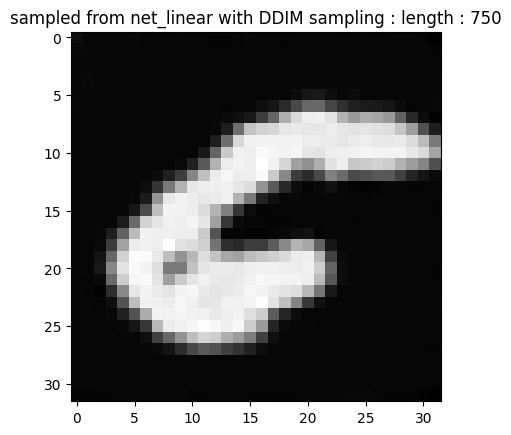

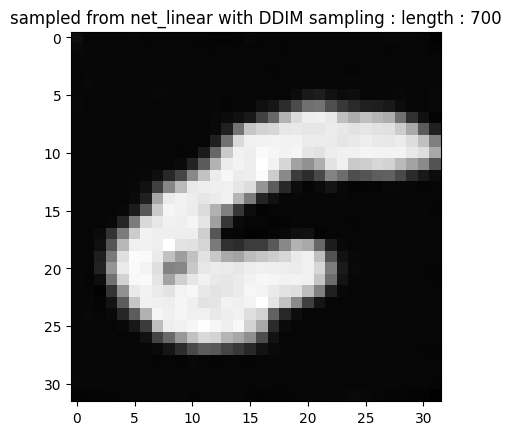

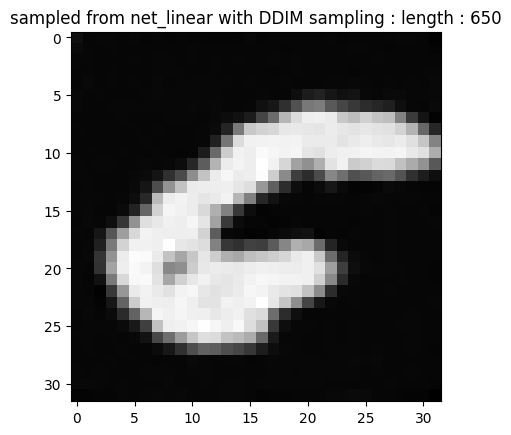

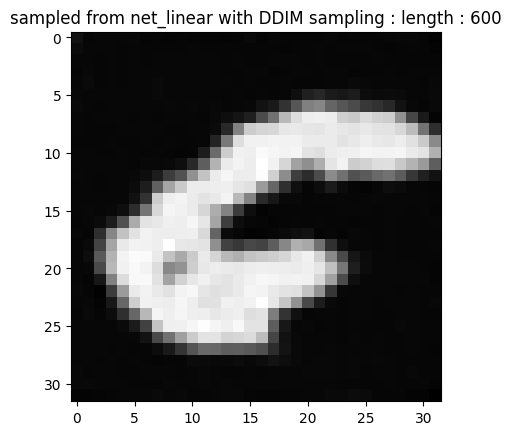

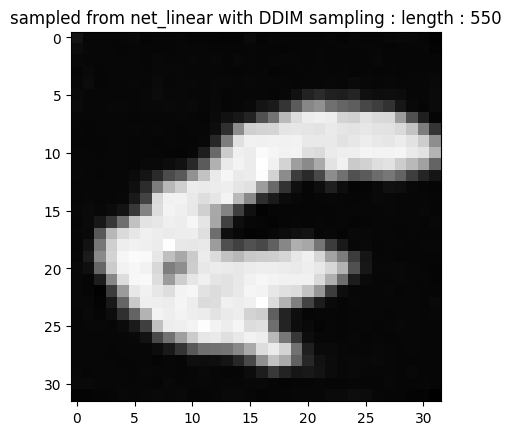

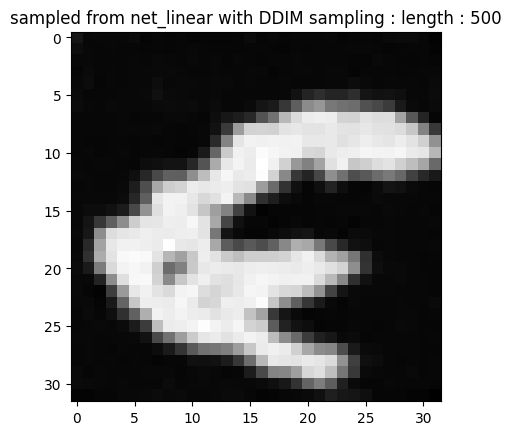

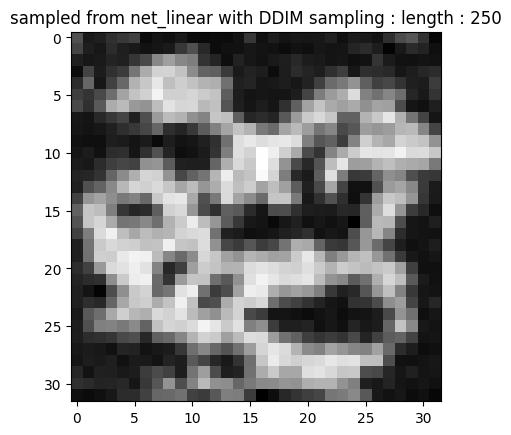

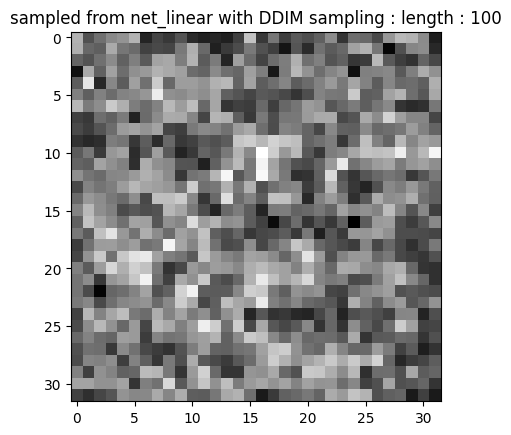

In [6]:
# length = near as timestep

lengths = [timestep - 3, 750, 700, 650, 600, 550, 500, 250, 100]

for length in lengths:
    res:torch.Tensor = sampling_DDIM(timestep,
                                    linear_sqrt_alphas,
                                    linear_sqrt_one_minus_alphas,
                                    loaded_linear_net,
                                    device,
                                    noise=init_noise,
                                    length=length)

    plt.figure()
    plt.title(f"sampled from net_linear with DDIM sampling : length : {length}")
    plt.imshow(res.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')

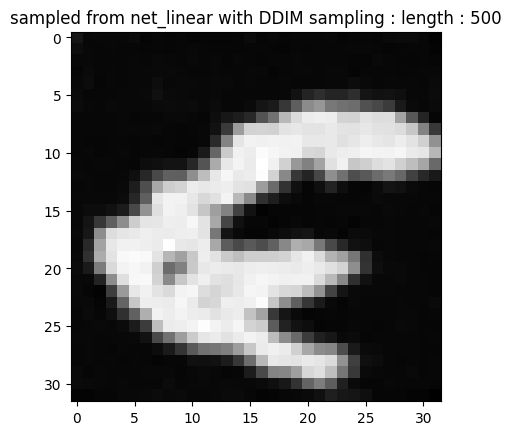

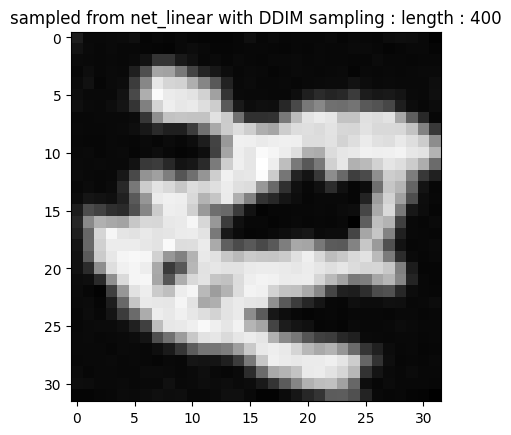

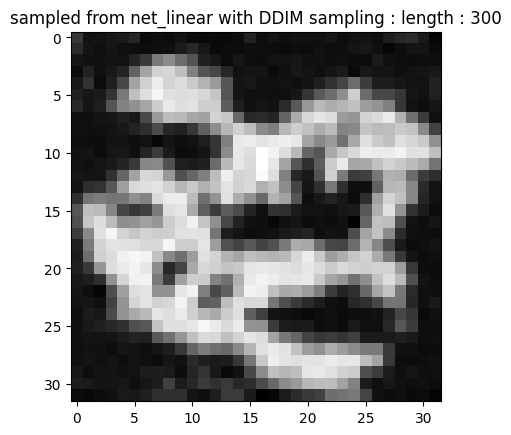

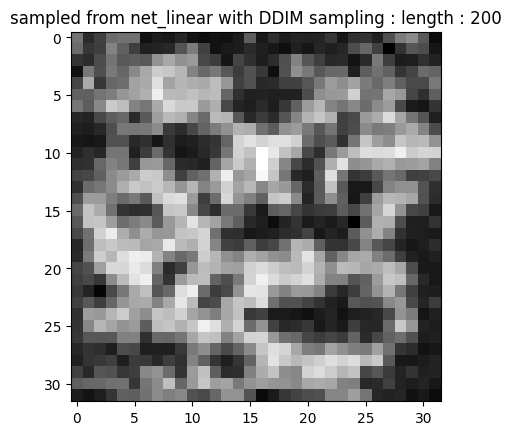

In [7]:
lengths = [500, 400, 300, 200]

for length in lengths:
    res:torch.Tensor = sampling_DDIM(timestep,
                                    linear_sqrt_alphas,
                                    linear_sqrt_one_minus_alphas,
                                    loaded_linear_net,
                                    device,
                                    noise=init_noise,
                                    length=length)

    plt.figure()
    plt.title(f"sampled from net_linear with DDIM sampling : length : {length}")
    plt.imshow(res.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')

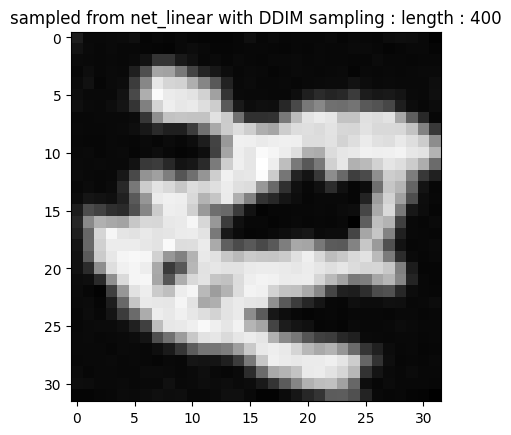

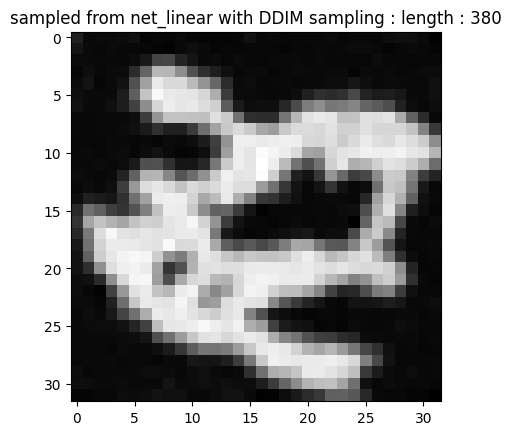

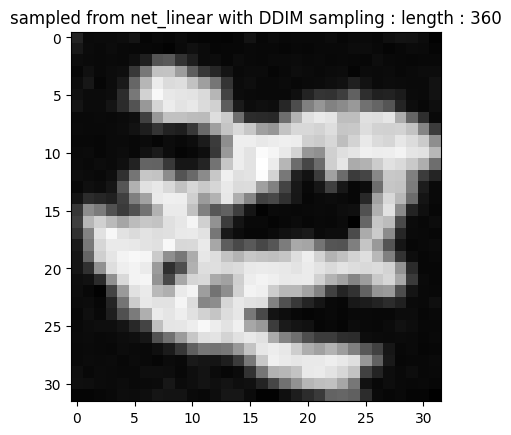

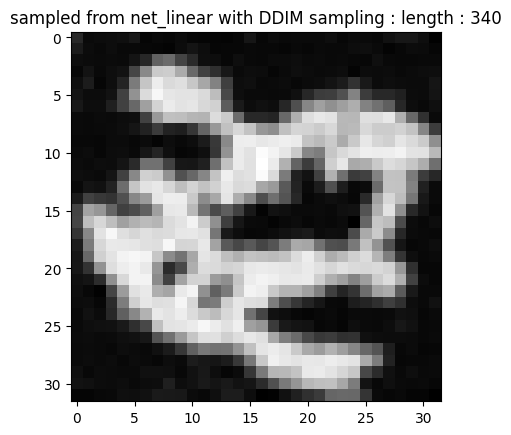

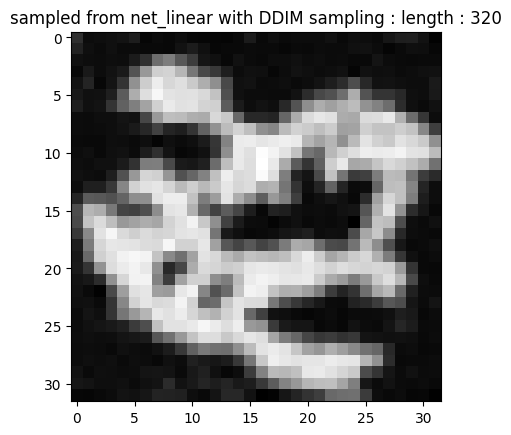

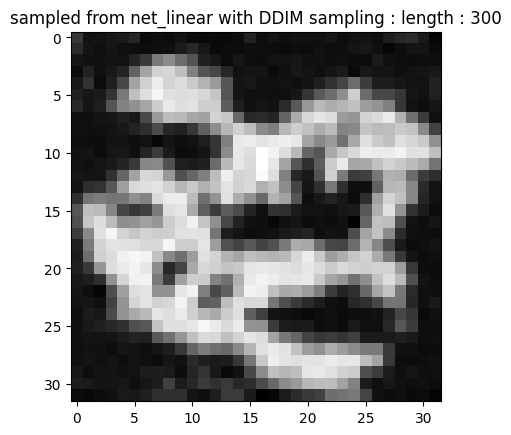

In [8]:
lengths = [400, 380, 360, 340, 320, 300]

for length in lengths:
    res:torch.Tensor = sampling_DDIM(timestep,
                                    linear_sqrt_alphas,
                                    linear_sqrt_one_minus_alphas,
                                    loaded_linear_net,
                                    device,
                                    noise=init_noise,
                                    length=length)

    plt.figure()
    plt.title(f"sampled from net_linear with DDIM sampling : length : {length}")
    plt.imshow(res.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')

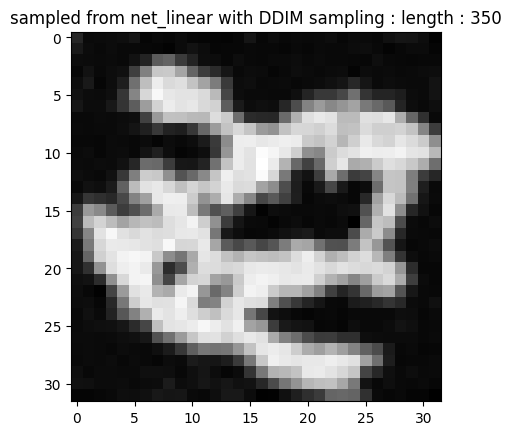

In [9]:
length = 350

res:torch.Tensor = sampling_DDIM(timestep,
                                    linear_sqrt_alphas,
                                    linear_sqrt_one_minus_alphas,
                                    loaded_linear_net,
                                    device,
                                    noise=init_noise,
                                    length=length)

plt.figure()
plt.title(f"sampled from net_linear with DDIM sampling : length : {length}")
plt.imshow(res.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')

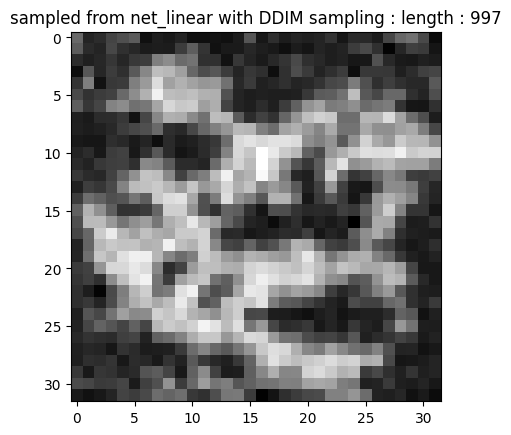

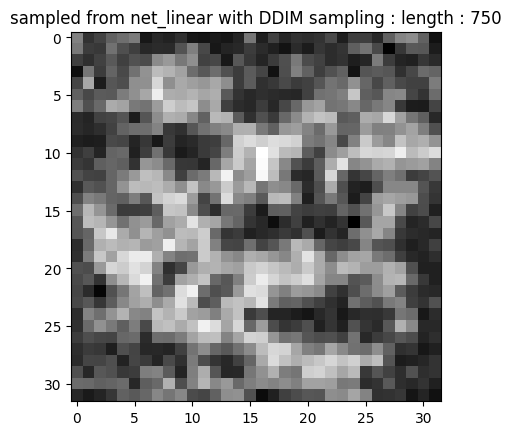

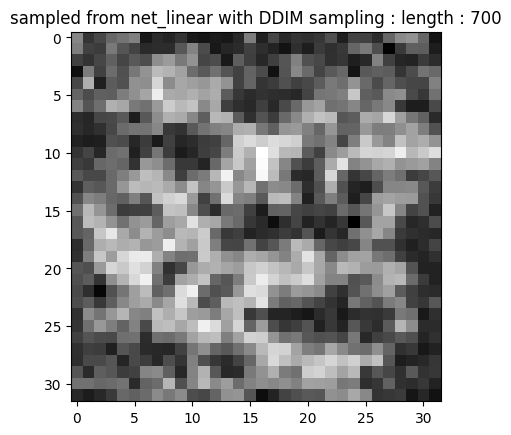

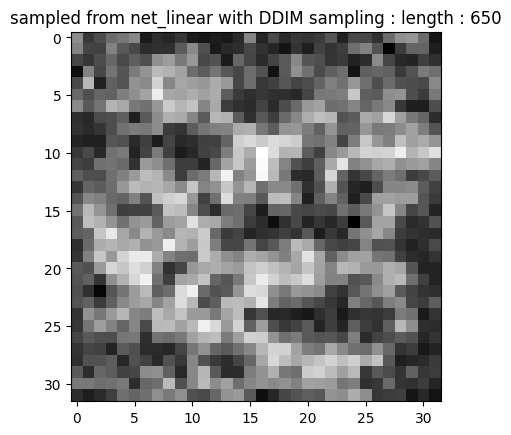

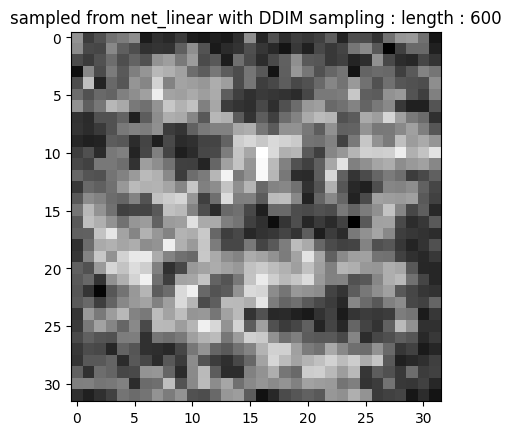

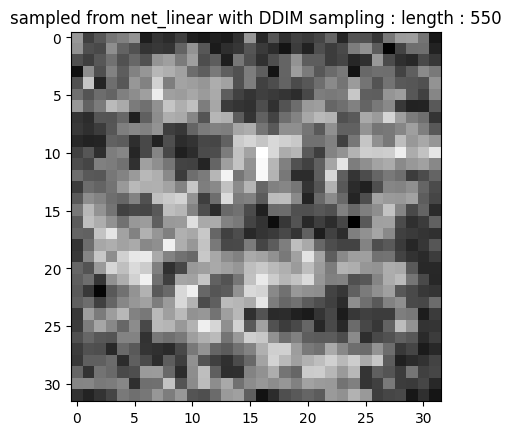

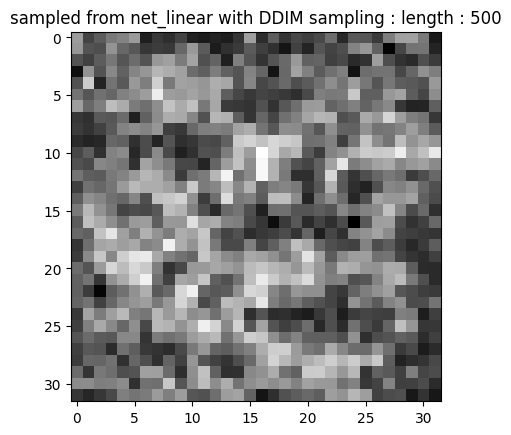

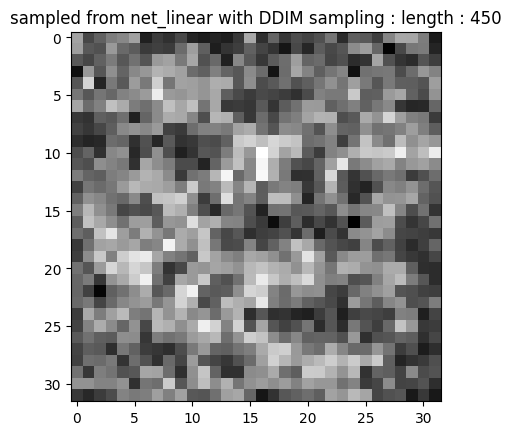

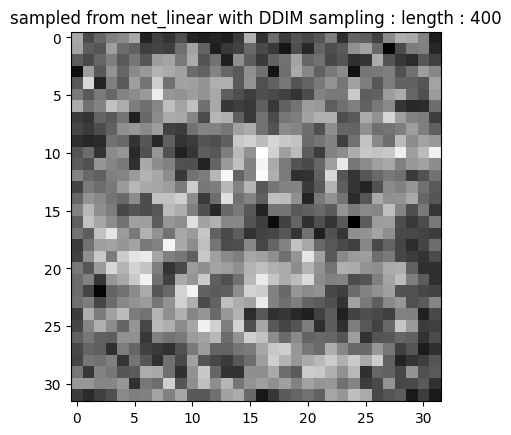

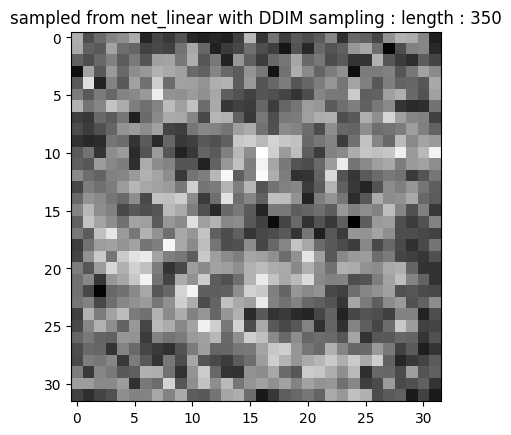

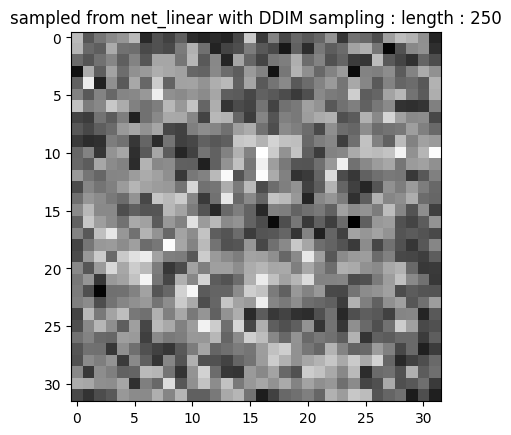

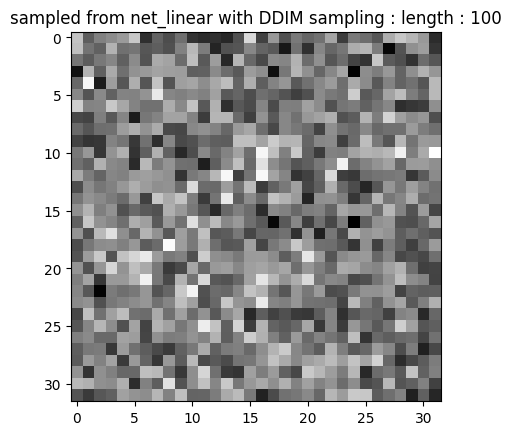

In [10]:
# length - with compressed exp scheduling

lengths = [timestep - 3, 750, 700, 650, 600, 550, 500, 450, 400, 350, 250, 100]

for length in lengths:
    res:torch.Tensor = sampling_DDIM(timestep,
                                    linear_sqrt_alphas,
                                    linear_sqrt_one_minus_alphas,
                                    loaded_linear_net,
                                    device,
                                    noise=init_noise,
                                    length=length,
                                    sampling="comp exp")

    plt.figure()
    plt.title(f"sampled from net_linear with DDIM sampling : length : {length}")
    plt.imshow(res.cpu().detach().numpy()[0].reshape(32,32), cmap='gray')